# Ejemplo 4.3: Aleta Cilíndrica con Enfriamiento por Convección
 
 Este notebook resuelve un problema de **conducción 1D con una fuente dependiente de la temperatura**, modelando el enfriamiento de una aleta.
 
 ### Planteamiento del Problema
 
 Se analiza una aleta cilíndrica de 1 m de longitud. La base está a 100 °C y el extremo está aislado térmicamente. La aleta pierde calor hacia el ambiente (a 20 °C) por convección.
 
 **Ecuación Gobernante:**
 La pérdida de calor por convección se modela como un término fuente negativo. La ecuación es:
 $$\dfrac{d}{dx}\left(k\,A\dfrac{dT}{dx}\right)-hP\left(T-T_{\infty}\right)=0$$

 
 **Datos:**
 - Longitud, $L = 1 \, m$
 - Temperatura base, $T_B = 100^\circ C$
 - Temperatura ambiente, $T_\infty = 20 ^\circ C$
 - Extremo aislado: $\frac{dT}{dx} = 0$ (Condición de Neumann de flujo nulo).
 - Parámetro de la aleta: $n^2 = \frac{hP}{kA} = 25 \, m^{-2}$


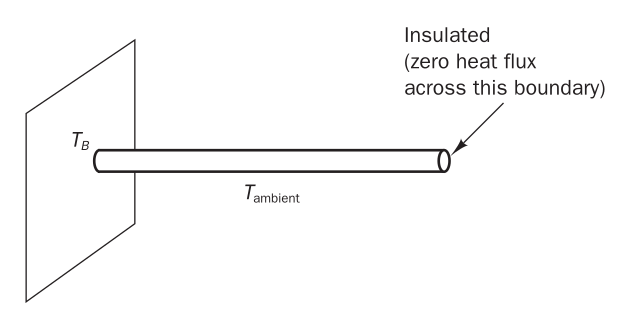

**Solución Analítica:**
 $$ \frac{T-T_\infty}{T_B-T_\infty} = \frac{\cosh[n(L-x)]}{\cosh(nL)} $$

In [3]:
from mnspy import Vertice, Celda, Superficie, VolumenFinito, SuperficieDirichlet, SuperficieNeumann
import numpy as np
import matplotlib.pyplot as plt

### Paso 1: Definición de Parámetros y Discretización

In [5]:
L = 1.0
n_celdas = 10
delta_x = L / n_celdas

T_0 = 100
T_inf = 20.0

# Para simplificar, usamos k=1, A=1. El término hP se ajusta para que hP/(kA) = 25.
k = 1.0
A = 1.0
hP = 25.0  # h * Perímetro

# Se crean los n+1 vértices.
v = [Vertice(str(i), i*delta_x) for i in range(n_celdas + 1)]

# Se crean las superficies.
# - El extremo izquierdo (i=0) es Dirichlet (temperatura fija).
# - El extremo derecho (i=n) es Neumann (flujo nulo).
s = list()
for i in range (n_celdas + 1):
    if i == 0:
        s.append(SuperficieDirichlet(str(i),[i], {'T': T_0}, A))
    elif i == n_celdas:
        s.append(SuperficieNeumann(str(i),[i], 0.0, A))
    else:
        s.append(Superficie(str(i),[i], A))

# Se crean las celdas, pasando los parámetros para el término fuente de convección.
c = [Celda(str(i+1), [i, i+1], gamma=k, q=0, h=hP, p=1, T_inf=T_inf) for i in range(n_celdas)]

### Paso 2: Ensamblaje y Solución

In [6]:
vol = VolumenFinito(v,s,c)

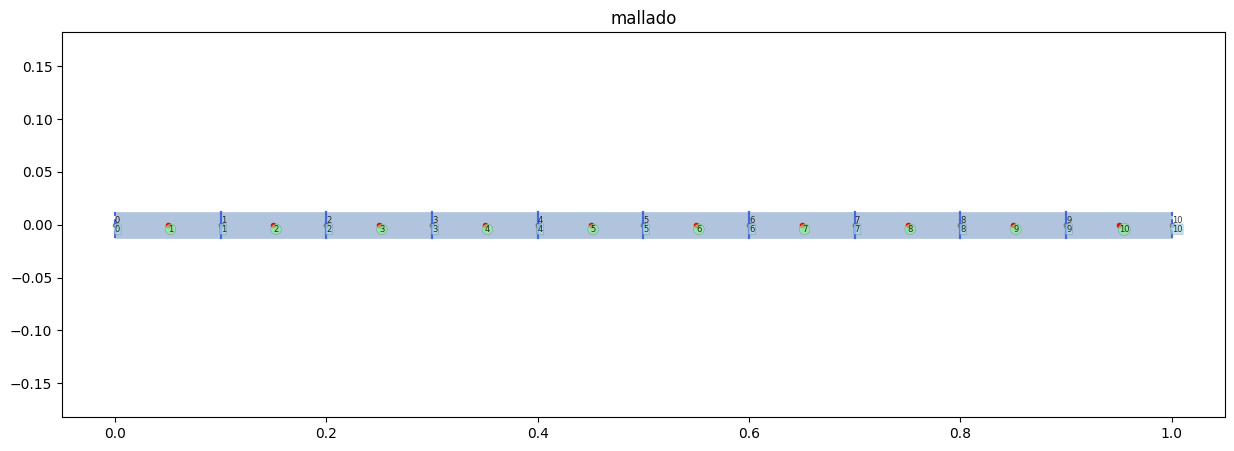

In [7]:
vol.mallado()

In [8]:
vol.mostrar_ecuaciones()

<IPython.core.display.Math object>

In [9]:
vol.solucionar_por_Gauss()
vol.mostrar_sistema_lineal_ecuaciones()

<IPython.core.display.Math object>

In [10]:
vol._sol.solucion()

,Solución
$T_{1}$,80.5991
$T_{2}$,56.9471
$T_{3}$,42.5318
$T_{4}$,33.7495
$T_{5}$,28.4046
$T_{6}$,25.1608
$T_{7}$,23.2072
$T_{8}$,22.0555
$T_{9}$,21.4176
$T_{10}$,21.134


### Paso 3: Post-procesamiento y Comparación con Solución Analítica

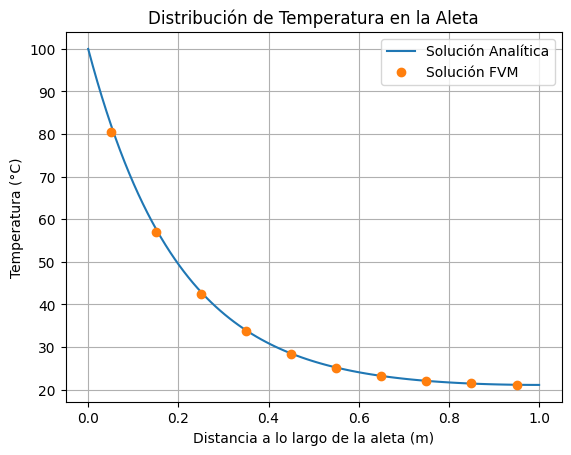

In [11]:
# Definimos la función de la solución analítica
n_param = np.sqrt(hP / (k * A))
def T_analitica(x):
 return T_inf + (T_0 - T_inf) * (np.cosh(n_param * (L - x)) / np.cosh(n_param * L))

# Obtenemos los puntos y la solución numérica
x_numeric = [celda.centroide.x for celda in vol.celdas]
T_numeric = vol.get_solucion().flatten()

# Creamos puntos para la curva analítica
x_analytic = np.linspace(0, L, 100)
T_analytic = T_analitica(x_analytic)

# Graficamos ambas soluciones
plt.figure()
plt.plot(x_analytic, T_analytic, label='Solución Analítica')
plt.plot(x_numeric, T_numeric, 'o', label='Solución FVM')
plt.xlabel('Distancia a lo largo de la aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperatura en la Aleta')
plt.legend()
plt.grid(True)
plt.show()

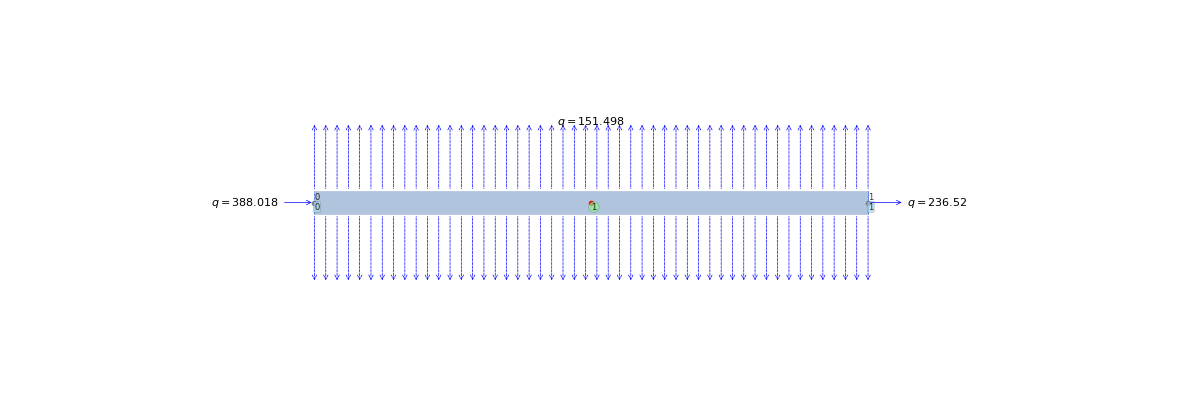

In [8]:
vol.get_celda('1').diagrama_balance()

**Conclusión:** La solución numérica del FVM se ajusta excelentemente a la solución analítica, demostrando que el método maneja correctamente tanto las condiciones de frontera de Neumann como los términos fuente dependientes de la solución.